# 학습된 모델의 W, b 를 가져와서 모델 실행

#### [학습에 필요한 모듈 선언]

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import os
from datetime import datetime

#### [환경설정]

In [2]:
# 훈련용 데이터 수 선언
trainDataNumber = 100
# 모델 최적화를 위한 학습률 선언
learningRate = 0.01
# 총 학습 횟수 선언
totalStep = 1001

#### [빌드단계] Step 1) 학습데이터 준비

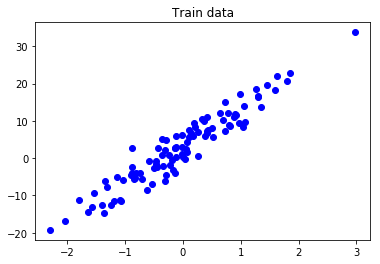

In [3]:
# 항상 같은 난수를 생성하기 위하여 시드설정
np.random.seed(321)

# 학습 데이터 리스트 선언
xTrainData = list()
yTrainData = list()

# 학습 데이터 생성
xTrainData = np.random.normal(0.0, 1.0, size=trainDataNumber)

for x in xTrainData:
    # y 데이터 생성
    y = 10 * x + 3 + np.random.normal(0.0, 3)
    yTrainData.append(y)

# 학습 데이터 확인
plt.plot(xTrainData, yTrainData, 'bo')
plt.title("Train data")
plt.show()

#### [빌드단계] Step 2) 모델생성을 위한 변수 초기화

In [4]:
# Weight 변수 선언
W = tf.Variable(tf.random_uniform([1]))
# Bias 변수 선언
b = tf.Variable(tf.random_uniform([1]))

# 학습데이터 xTrainData가 들어갈 플레이스 홀더 선언
X = tf.placeholder(tf.float32)
# 학습데이터 yTrainData가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32)

#### [빌드단계] Step 3) 학습 모델 그래프 구성

In [5]:
# 3-1) 학습데이터를 대표 하는 가설 그래프 선언
#방법1 : 일반 연산기호를 이용하여 가설 수식 작성Ehd adsfdd
hypothesis = W * X + b
#방법2 :  tensorflow 함수를 이용하여 가설 수식 작성
#hypothesis = tf.add(tf.multiply(W,X),b)

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = tf.reduce_mean(tf.square(hypothesis - Y))

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
train = optimizer.minimize(costFunction)

# [Tensor 변수 저장]

In [6]:
# 모델 저장을 위한 saver 객체 호출
# variable 을 선언하기 전에 사용하게 되면 에러 발생함
# Session 실행전에 선언 해주도록 함
saver = tf.train.Saver()

#### [실행단계] 학습 모델 그래프를 실행

In [7]:
# 실행을 위한 세션 선언
sess = tf.Session()

# [저장된 모델의 유무 확인후 변수 초기화]
- LoadingSavedModel : **True**  => 저장된 모델의 변수 값을 가져와서 학습을 진행
- LoadingSavedModel : **False** => 저장된 모델을 사용하지 않고 다시 변수를 초기화 하여 학습을 진행

In [8]:
LoadingSavedModel = True


if LoadingSavedModel :    
    ckpt = tf.train.get_checkpoint_state('./model')

    if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
        # 저장된 모델이 있으면 마지막으로 저장된 모델 가져옴
        saver.restore(sess, ckpt.model_checkpoint_path)
        print("Loading model : "+ckpt.model_checkpoint_path)
    else:
        # 최적화 과정을 통하여 구해질 변수 W, b 초기화
        sess.run(tf.global_variables_initializer())
        print("Init variables.")
else:
    # 최적화 과정을 통하여 구해질 변수 W, b 초기화
    sess.run(tf.global_variables_initializer())


INFO:tensorflow:Restoring parameters from ./model/model_20190702_15512.ckpt
Loading model : ./model/model_20190702_15512.ckpt


# [저장된 데이터를 이용하여 테스트 결과 확인]

In [14]:
# 저장된 모델에서 Variable 값을 가져옴
print("[Load Model Variable]")
print("- Weight")
print(sess.run(W))
print("- Bias")
print(sess.run(b))
print("--------------------------------------------------------------------------------")
print("[Test Result]")
# 테스트를 위하여 x값 선언
testXValue = [2.5]
# 최적화된 모델에 x에 대한 y 값 계산
resultYValue = sess.run(hypothesis, feed_dict={X:testXValue})
# 테스트 결과값 출력
print("x value is {}, y value is {}".format(testXValue, resultYValue))
print("--------------------------------------------------------------------------------")


[Load Model Variable]
- Weight
[9.960744]
- Bias
[3.1907847]
--------------------------------------------------------------------------------
[Test Result]
x value is [2.5], y value is [28.092644]
--------------------------------------------------------------------------------


In [15]:
#세션종료
sess.close()